## Reproduce results in Figure 3

Related dataset: 
- [Xenium mouse brain](https://www.10xgenomics.com/cn/datasets/preview-data-ffpe-human-lung-cancer-with-xenium-multimodal-cell-segmentation-1-standard)
- [VisiumHD mouse brain](https://www.10xgenomics.com/cn/datasets/visium-hd-cytassist-gene-expression-libraries-of-mouse-brain-he)
- [MERFISH mouse brain](https://www.10xgenomics.com/cn/datasets/xenium-human-lung-cancer-post-xenium-technote)
- [Stereseq mouse brain](https://www.10xgenomics.com/cn/datasets/xenium-human-lung-cancer-post-xenium-technote)
    - Due to the notable diffusion problem in Stereoseq, we disable the patch-effect to stablize the training: `no_patch_effect = True`
Reference can be download [here](11)

All the datasets are training with epoch settings: `epochs = 400` `seg_training_epochs = 15` `deconv_warmup_epochs = 200`

All the data for reproducing the result can be downloaded [here](temp_link)

In [50]:
import scanpy as sc
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import spatialdata_plot
import numpy as np

### Comparison of Xenium and VisiumHD annotation

In [5]:
adata_hd = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/epoch_550/cell_deconv.h5ad")
adata_xenium = sc.read_h5ad("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/epoch_250/cell_deconv.h5ad")

In [4]:
celltype_mapping = {
    'Astro': '#ff0000',
    'Oligo': '#ff9900',
    'L2/3 IT CTX': '#ccff00',
    'L4/5 IT CTX': '#33ff00',
    'L6 CT CTX': '#00ff66',
    'Sst': '#00ffff',
    'Pvalb': '#0066ff',
    'DG': '#00ccff',
    'L2/3 IT ENTl': '#9900ff',
    'L5 IT CTX': '#ff00cc',
    'L4 RSP-ACA': '#ff0066',
    'L5/6 IT TPE-ENT': '#ff0033',
    'Endo': '#ff6600',
    'L2 IT ENTl': '#99cc00',     # Changed from #ccff00
    'L5 PT CTX': '#66ff00',
    'Lamp5': '#cc3399',          # Changed from #ff0066
    'VLMC': '#00ff99',
    'L2/3 IT PPP': '#3399ff',    # Changed from #0066ff
    'Car3': '#3300ff',
    'CA1-ProS': '#6600ff',
    'SMC-Peri': '#cc00ff',
    'L6b CTX': '#ff33cc',        # Changed from #ff00cc
    'L5/6 NP CTX': '#ff3399',    # Changed from #ff0099
    'Sncg': '#ff3366',           # Changed from #ff0033
    'Vip': '#ff9966',            # Changed from #ff6600
    'L6 IT CTX': '#99ff66',      # Changed from #ccff00
    'CA3': '#99ff00',
    'L3 IT ENT': '#33ff66',      # Changed from #33ff00
    'Micro-PVM': '#00ffaa',      # Changed from #00ff99
    'CR': '#0099aa',             # Changed from #00ffff
    'L6 IT ENTl': '#3399cc',     # Changed from #0099ff
    'Sst Chodl': '#0033cc',      # Changed from #0033ff
    'L2 IT ENTm': '#6633cc',     # Changed from #6600ff
    'NP SUB': '#9933ff',         # Changed from #9900ff
    
    'CA2-IG-FC': '#cc33ff',      # Changed from #cc00ff
    'L5 PPP': '#ff33ff',         # Changed from #ff00ff
    'CT SUB': '#ff66cc',         # Changed from #ff0099
    'NP PPP': '#3333ff',         # Changed from #3300ff
    'L6b/CT ENT': '#ff6633',     # Changed from #ff3300
    'SUB-ProS': '#ffaa00',       # Changed from #ff9900
    'L2/3 IT RHP': '#ccff66',    # Changed from #ccff00

    'Others': '#F0F0F0'          # Grey, left unchanged
}

celltype_mapping_renamed = {
    k.replace(" ", "_").replace("/", "_").replace("-", "_"): k for k, _ in celltype_mapping.items()
}

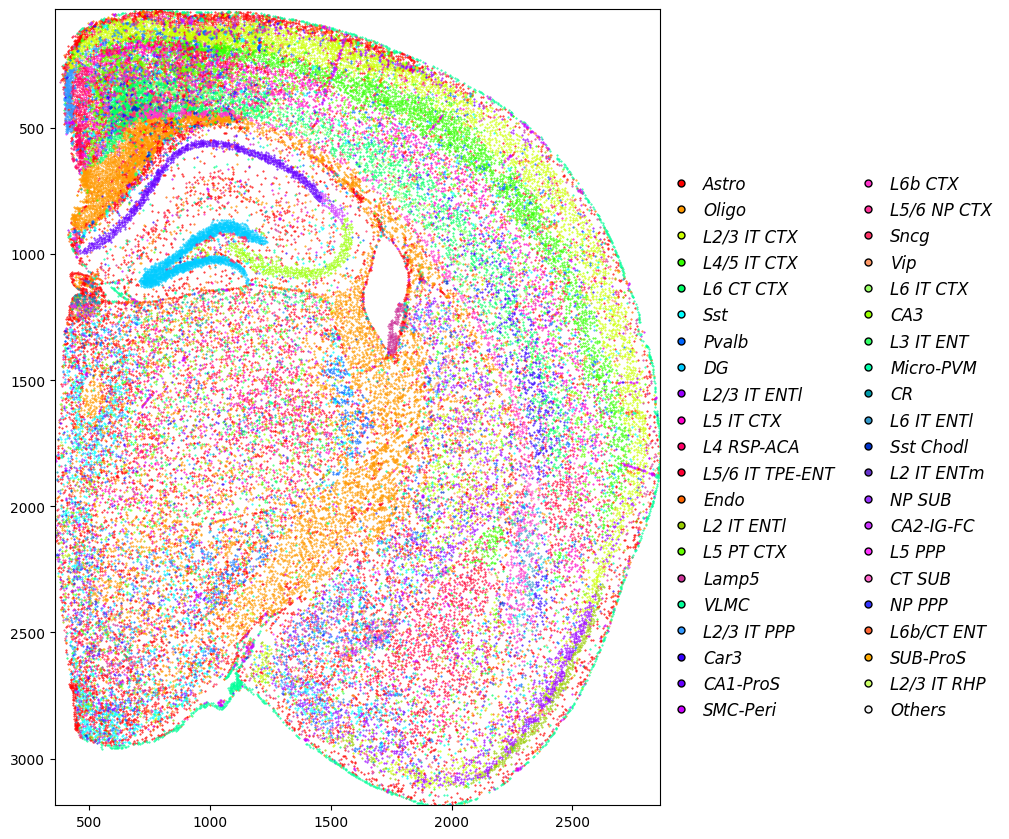

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(10, 10))
gs = GridSpec(1, 4, figure=fig)

adata_plot = adata_hd.copy()
for ax_ in ax.flatten():
    fig.delaxes(ax_)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])

celltype_names = list(celltype_mapping.keys())[:-1]
# selected_celltype = ["Tumor II", "Tumor III", "Tumor V"]
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    # (0,0) is on the top left corner
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = adata_plot[adata_plot.obs["celltype"] == celltype_names[i - 1]].obs
    ax1.scatter(sub_df["y"], sub_df["x"], s=0.2, label=celltype_names[i - 1], color=celltype_mapping[celltype_names[i - 1]])
# ax1.invert_yaxis()
# ax1.axis("off")
ax1.set_xlim(adata_plot.obs["y"].min(), adata_plot.obs["y"].max())
ax1.set_ylim(adata_plot.obs["x"].min(), adata_plot.obs["x"].max())
ax1.invert_yaxis()

# Add legend elements (example)
legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='None',
        color='w',
        label=label,
        markerfacecolor=color,
        markeredgecolor='k',
        markersize=5
    ) for label, color in celltype_mapping.items()
]

ax2.legend(
    handles=legend_elements,
    loc='center',                    # Center the legend within the bounding box
    bbox_to_anchor=(0.48, 0.45),       # Center of ax2 (0.5, 0.5 is the middle of the axis)
    ncol=2,                          # Number of columns for the legend
    handletextpad=0.35,               # Spacing between marker and text
    columnspacing=1,               # Spacing between legend columns
    prop={'size': 12, 'style': 'italic'},  # Font size and style
    frameon=False                    # No border for the legend
)


ax2.axis("off")  # Hide the axis for ax2
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space for the legend below the plots


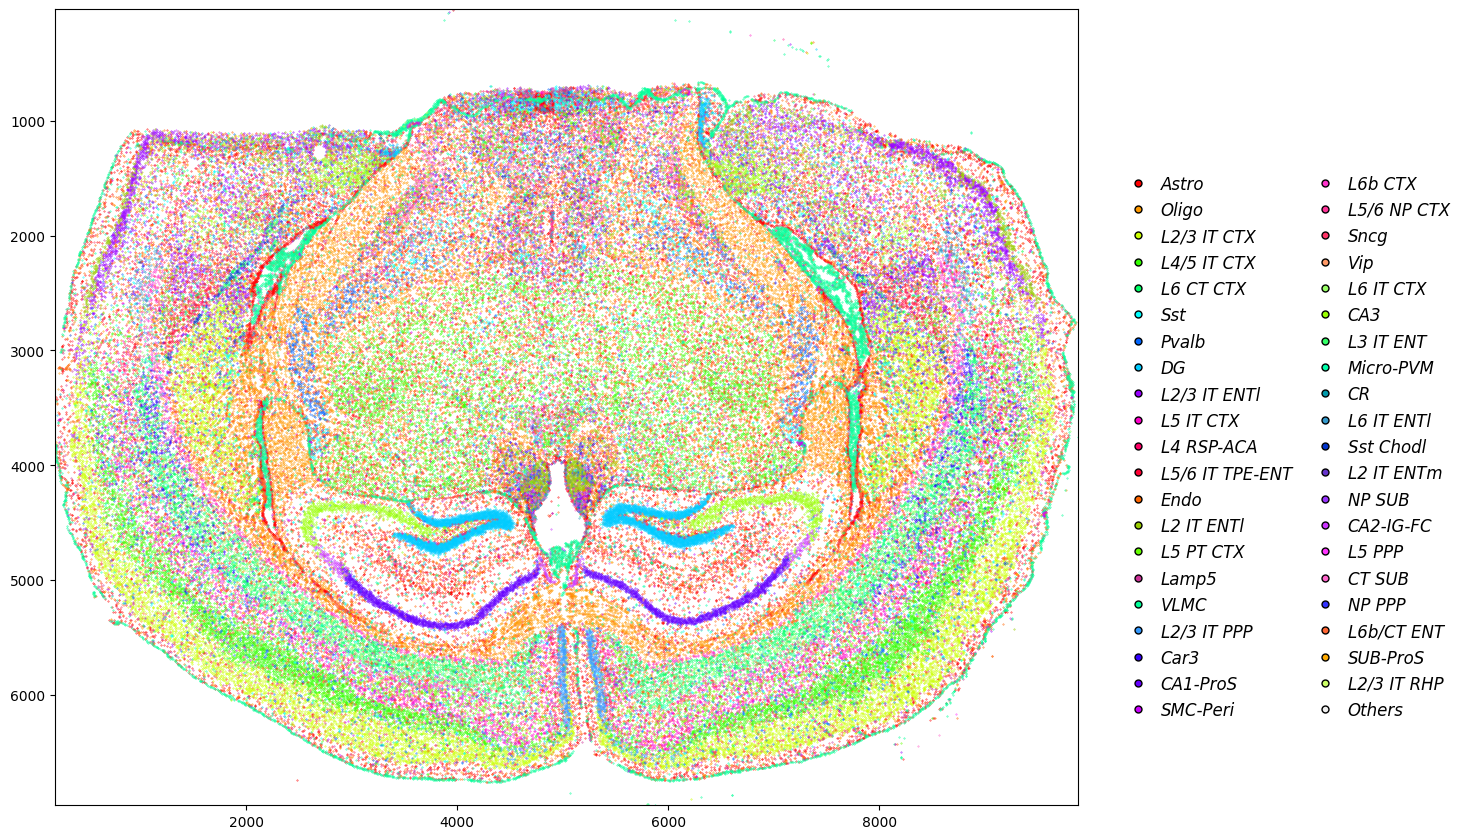

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
gs = GridSpec(1, 4, figure=fig)

adata_plot = adata_xenium.copy()
for ax_ in ax.flatten():
    fig.delaxes(ax_)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])

celltype_names = list(celltype_mapping.keys())[:-1]
# selected_celltype = ["Tumor II", "Tumor III", "Tumor V"]
selected_celltype = celltype_names
for i in range(len(celltype_names)):
    # (0,0) is on the top left corner
    if celltype_names[i] not in selected_celltype:
        continue
    sub_df = adata_plot[adata_plot.obs["celltype"] == celltype_names[i - 1]].obs
    ax1.scatter(sub_df["y"], sub_df["x"], s=0.1, label=celltype_names[i - 1], color=celltype_mapping[celltype_names[i - 1]])
# ax1.invert_yaxis()
# ax1.axis("off")
ax1.set_xlim(adata_plot.obs["y"].min(), adata_plot.obs["y"].max())
ax1.set_ylim(adata_plot.obs["x"].min(), adata_plot.obs["x"].max())
ax1.invert_yaxis()

# Add legend elements (example)
legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='None',
        color='w',
        label=label,
        markerfacecolor=color,
        markeredgecolor='k',
        markersize=5
    ) for label, color in celltype_mapping.items()
]

ax2.legend(
    handles=legend_elements,
    loc='center',                    # Center the legend within the bounding box
    bbox_to_anchor=(0.48, 0.45),       # Center of ax2 (0.5, 0.5 is the middle of the axis)
    ncol=2,                          # Number of columns for the legend
    handletextpad=0.35,               # Spacing between marker and text
    columnspacing=1,               # Spacing between legend columns
    prop={'size': 12, 'style': 'italic'},  # Font size and style
    frameon=False                    # No borderb for the legend
)


ax2.axis("off")  # Hide the axis for ax2
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space for the legend below the plots


In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_bar(df, x_col, y_col, hue, y_label, ax, method_colors, error_bar=False):
    # Plot
    if error_bar:
        sns.barplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=hue,
            estimator=np.median,
            errorbar=('pi', 10),
            capsize=0.1,
            palette=method_colors,
            ax=ax,
            err_kws={"linewidth": 1}
        )
    else:
        sns.barplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=hue,
            capsize=0.1,
            palette=method_colors,
            ax=ax,
            err_kws={"linewidth": 1}
        )

    # Axis labels and limits
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel('')
    # ax.set(ylim=(0.18, 0.22))

    # Rotate x-tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Remove grid
    ax.grid(False)

    # Customize spines (axis lines)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add small outward ticks
    ax.tick_params(
        axis='both',
        which='major',
        direction='out',
        length=4,
        width=1,
        color='black',
        bottom=True, top=False, left=True, right=False
    )


In [26]:
method_colors = {
    'VisiumHD': '#FF968D',  # Blue
    'Xenium': '#99DAFF',    # Orange
}

/tmp/ipykernel_866475/3461121328.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


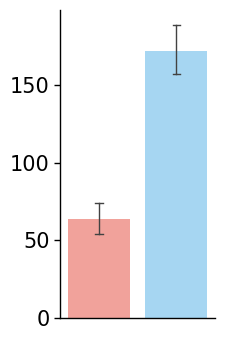

In [35]:
# Avg UMI for VisiumHD, Xenium, MERFISH
UMI_hd = adata_hd.X.sum(axis=1)
UMI_xenium = adata_xenium.X.sum(axis=1)

# Bar plot with error bars
df = pd.DataFrame({
    'Method': ['VisiumHD'] * len(UMI_hd) + ['Xenium'] * len(UMI_xenium), 
    'Avg UMI': np.concatenate([UMI_hd, UMI_xenium]) 
})

fig, ax = plt.subplots(figsize=(2, 4))
plot_bar(
    df,
    x_col='Method',
    y_col='Avg UMI',
    hue='Method',
    y_label='Avg UMI',
    ax=ax,
    method_colors=method_colors,
    error_bar=True
)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15)

In [36]:
import torch
from tqdm.notebook import tqdm

mask_hd = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/new_segmentation_mask.npy")
mask_xenium = np.load("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/new_segmentation_mask.npy")
mask_hd_torch = torch.from_numpy(mask_hd).cuda()
mask_xenium_torch = torch.from_numpy(mask_xenium).cuda()

# Get cell size for each modality
size_hd = []
for i in torch.unique(mask_hd_torch):
    if i == 0:
        continue
    size_hd.append((mask_hd_torch == i).sum().item())

size_xenium = []
for i in torch.unique(mask_xenium_torch):
    if i == 0:
        continue
    size_xenium.append((mask_xenium_torch == i).sum().item())

/tmp/ipykernel_866475/3461121328.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


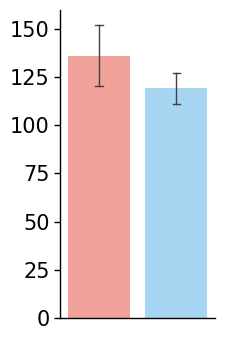

In [37]:
# Plot cell size
df = pd.DataFrame({
    'Method': ['VisiumHD'] * len(size_hd) + ['Xenium'] * len(size_xenium), #  + ['MERFISH'] * len(size_merfish),
    'Cell Size': np.concatenate([[4*x for x in size_hd], size_xenium]) # , size_merfish])
})
fig, ax = plt.subplots(figsize=(2, 4))
plot_bar(
    df,
    x_col='Method',
    y_col='Cell Size',
    hue='Method',
    y_label='Cell Size',
    ax=ax,
    method_colors=method_colors,
    error_bar=True
)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15)

/tmp/ipykernel_866475/3461121328.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


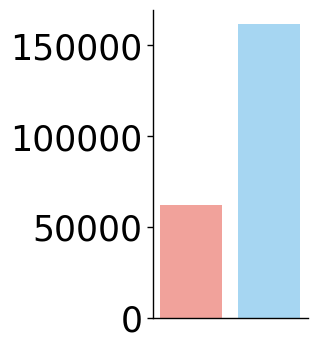

In [38]:
df = pd.DataFrame({
    'Method': ['VisiumHD', 'Xenium'], # 'MERFISH'],
    'Cell Number': [adata_hd.shape[0], adata_xenium.shape[0]] #, adata_st_svt_merfish.shape[0]]
})
fig, ax = plt.subplots(figsize=(2, 4))
plot_bar(
    df,
    x_col='Method',
    y_col='Cell Number',
    hue='Method',
    y_label='Cell Number',
    ax=ax,
    method_colors=method_colors,
    error_bar=False
)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=25)

In [39]:
# Celltype propotion
# Filtered out celltypes with less than 5%
celltype_counts = adata_hd.obs['celltype'].value_counts()
filtered_celltypes = celltype_counts[celltype_counts >= 0.01 * adata_hd.shape[0]].index.tolist()[:10]
# Find propotion in each modality
propotion_hd = adata_hd.obs['celltype'].value_counts(normalize=True)[filtered_celltypes]
propotion_xenium = adata_xenium.obs['celltype'].value_counts(normalize=True)[filtered_celltypes]

/tmp/ipykernel_866475/3461121328.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


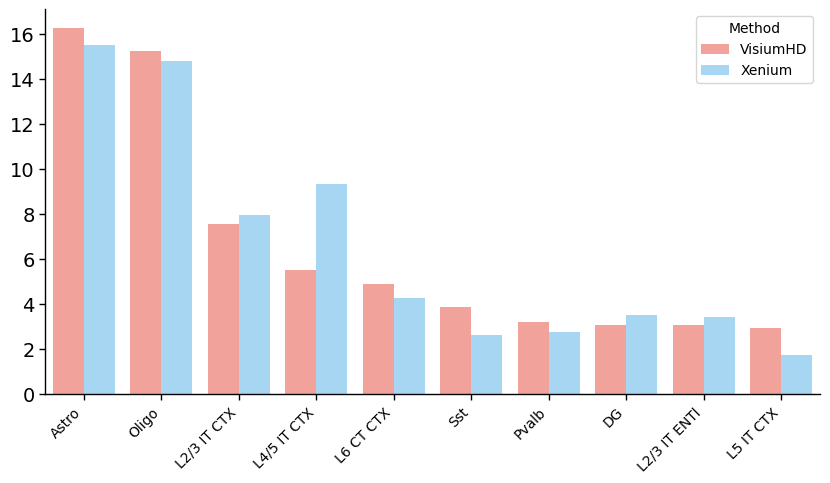

In [44]:
# Plot bar plot for celltype propotion
df = pd.DataFrame({
    'Celltype': filtered_celltypes,
    'VisiumHD': propotion_hd.values,
    'Xenium': propotion_xenium.values,
    # 'MERFISH': propotion_merfish.values
})
df = df.melt(id_vars='Celltype', var_name='Method', value_name='Proportion')
# Propotion -> percentage
df['Proportion'] *= 100

fig, ax = plt.subplots(figsize=(10, 5))
plot_bar(
    df,
    x_col='Celltype',
    y_col='Proportion',
    hue='Method',
    y_label='Celltype Proportion',
    ax=ax,
    method_colors=method_colors,
    error_bar=False
)
# No legend
# ax.legend().remove()
# Save not show
# No x,y labels
# Save not show
# No x,y labels
# ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_ylim(0.7, 0.85)
# No x tick
# ax.set_xticks([])
ax.tick_params(axis='y', labelsize=14)
                

### Hippocampus region comparison

In [ ]:
from cellart.utils.spatialdata_utils import append_xenium_boundary

adata_st_svt = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/epoch_550/cell_deconv.h5ad")
adata_st_svt_xenium = sc.read_h5ad("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/epoch_250/cell_deconv.h5ad")
adata_st_svt_merfish = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/MerfishMouseBrain_Annotation/epoch_600/cell_deconv.h5ad")
adata_st_svt_stereoseq = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/StereoseqAnnotationNoPatch/epoch_850/cell_deconv.h5ad")

mask_hd = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/new_segmentation_mask.npy")
mask_xenium = np.load("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/new_segmentation_mask.npy")
mask_merfish = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/MerfishMouseBrain_Annotation/new_segmentation_mask.npy")
mask_stereoseq = np.load("/import/home2/yhchenmath/Code/Triplet/LOG/StereoseqAnnotationNoPatch/new_segmentation_mask.npy")



celltype_mapping = {
    'Astro': '#ff0000',
    'Oligo': '#ff9900',
    'L2/3 IT CTX': '#ccff00',
    'L4/5 IT CTX': '#33ff00',
    'L6 CT CTX': '#00ff66',
    'Sst': '#00ffff',
    'Pvalb': '#0066ff',
    'DG': '#00ccff',
    'L2/3 IT ENTl': '#9900ff',
    'L5 IT CTX': '#ff00cc',
    'L4 RSP-ACA': '#ff0066',
    'L5/6 IT TPE-ENT': '#ff0033',
    'Endo': '#ff6600',
    'L2 IT ENTl': '#99cc00',     # Changed from #ccff00
    'L5 PT CTX': '#66ff00',
    'Lamp5': '#cc3399',          # Changed from #ff0066
    'VLMC': '#00ff99',
    'L2/3 IT PPP': '#3399ff',    # Changed from #0066ff
    'Car3': '#3300ff',
    'CA1-ProS': '#6600ff',
    'SMC-Peri': '#cc00ff',
    'L6b CTX': '#ff33cc',        # Changed from #ff00cc
    'L5/6 NP CTX': '#ff3399',    # Changed from #ff0099
    'Sncg': '#ff3366',           # Changed from #ff0033
    'Vip': '#ff9966',            # Changed from #ff6600
    'L6 IT CTX': '#99ff66',      # Changed from #ccff00
    'CA3': '#99ff00',
    'L3 IT ENT': '#33ff66',      # Changed from #33ff00
    'Micro-PVM': '#00ffaa',      # Changed from #00ff99
    'CR': '#0099aa',             # Changed from #00ffff
    'L6 IT ENTl': '#3399cc',     # Changed from #0099ff
    'Sst Chodl': '#0033cc',      # Changed from #0033ff
    'L2 IT ENTm': '#6633cc',     # Changed from #6600ff
    'NP SUB': '#9933ff',         # Changed from #9900ff
    
    'CA2-IG-FC': '#cc33ff',      # Changed from #cc00ff
    'L5 PPP': '#ff33ff',         # Changed from #ff00ff
    'CT SUB': '#ff66cc',         # Changed from #ff0099
    'NP PPP': '#3333ff',         # Changed from #3300ff
    'L6b/CT ENT': '#ff6633',     # Changed from #ff3300
    'SUB-ProS': '#ffaa00',       # Changed from #ff9900
    'L2/3 IT RHP': '#ccff66',    # Changed from #ccff00

    'Others': '#F0F0F0'          # Grey, left unchanged
}

celltype_mapping_renamed = {
    k.replace(" ", "_").replace("/", "_").replace("-", "_"): v for k, v in celltype_mapping.items()
}

celltype_map = {
    k: k.replace(" ", "_").replace("/", "_").replace("-", "_") for k, _ in celltype_mapping.items()
}

In [48]:
import spatialdata as sd
adata_temp = adata_st_svt_merfish.copy()
gdf_merfish = append_xenium_boundary(mask_merfish, None, None, celltype = adata_temp.obs["celltype"])
boundaries = sd.models.ShapesModel.parse(gdf_merfish)
# img = sd.models.Image2DModel.parse(dapi, dims=("c", "y", "x"))
sdata_merfish = sd.SpatialData()
sdata_merfish.shapes["cell_boundaries"] = boundaries
# sdata_merfish.images["dapi"] = img

# Vizgen boundary
adata_temp = sc.read_h5ad("/import/home3/yhchenmath/Code/SVT/Data/MerfishMouseBrain/vizgen_scvi.h5ad")
mask_vizgen = np.load("/import/home3/yhchenmath/Code/ucs/data/vizgen_mouse_brain/cell_vizgen_mask.npy")
gdf_vizgen = append_xenium_boundary(mask_vizgen, None, None, celltype = adata_temp.obs["C_scANVI"])
boundaries = sd.models.ShapesModel.parse(gdf_vizgen)
sdata_merfish.shapes["vizgen_boundaries"] = boundaries

import math

theta =  - math.pi / 14
rotation = sd.transformations.Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

# sd.transformations.set_transformation(sdata_merfish.images["dapi"], rotation, to_coordinate_system="global")
sd.transformations.set_transformation(sdata_merfish.shapes["cell_boundaries"], rotation, to_coordinate_system="global")
sd.transformations.set_transformation(sdata_merfish.shapes["vizgen_boundaries"], rotation, to_coordinate_system="global")

x_min, x_max, y_min, y_max = 800, 1800, 4000, 7500
sdata_roi = sdata_merfish.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("y", "x"), target_coordinate_system="global"
)

ct_col = sdata_roi.shapes["cell_boundaries"].celltype
cts = sdata_roi.shapes["cell_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["cell_boundaries"][ct_col == ct]

ct_col = sdata_roi.shapes["vizgen_boundaries"].celltype
cts = sdata_roi.shapes["vizgen_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"vizgen_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["vizgen_boundaries"][ct_col == ct]

Not sdata provided
Not sdata provided


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_L6b_CTX` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_L6_CT_CTX` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_Oligo` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_Astro` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/env

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

(3974.3889155210727, 7523.4856912948735, 1824.441417437626, 764.9432837989315)

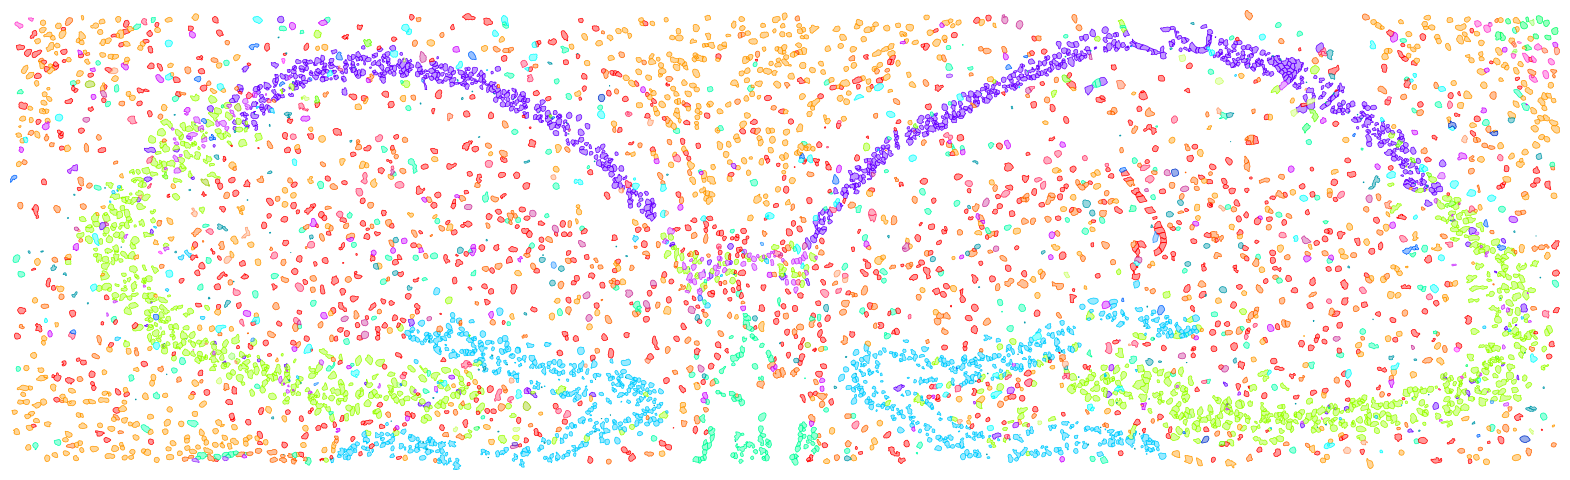

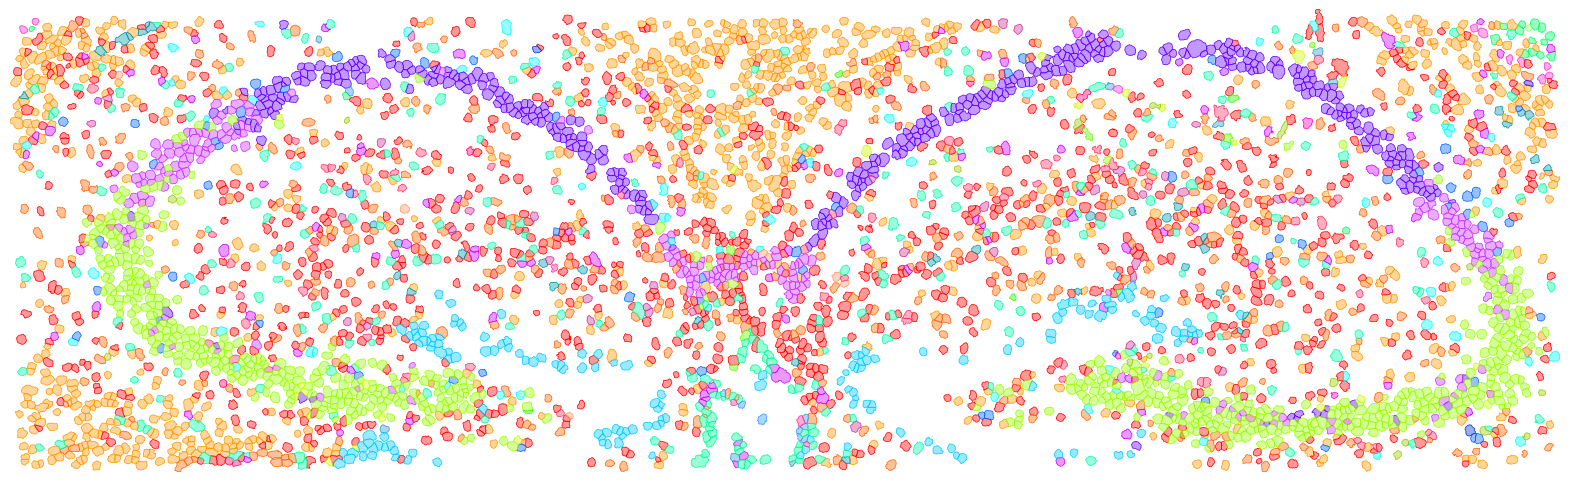

In [51]:
ct_col = sdata_roi.shapes["cell_boundaries"].celltype
cts = sdata_roi.shapes["cell_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["cell_boundaries"][ct_col == ct]

ct_col = sdata_roi.shapes["vizgen_boundaries"].celltype
cts = sdata_roi.shapes["vizgen_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"vizgen_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["vizgen_boundaries"][ct_col == ct]


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

tmp = None
draw_cts = sdata_roi.shapes["vizgen_boundaries"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"vizgen_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"vizgen_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

tmp = None
draw_cts = sdata_roi.shapes["cell_boundaries"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

Not sdata provided
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a 

/tmp/ipykernel_866475/2302732408.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid
/tmp/ipykernel_866475/2302732408.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid.y < -400) |
/tmp/ipykernel_866475/2302732408.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid.y > -105) |
/tmp/ipykernel_866475/2302732408.py:43: UserWarning: Geometry is in a geographic CRS. Res

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

/tmp/ipykernel_866475/2302732408.py:76: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_st_rctd_stereoseq.obs["celltype"] = rctd_result["first_type"]


INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

(3343.0596353603332, 5537.414694553214, -222.4643149808377, -797.4701232662396)

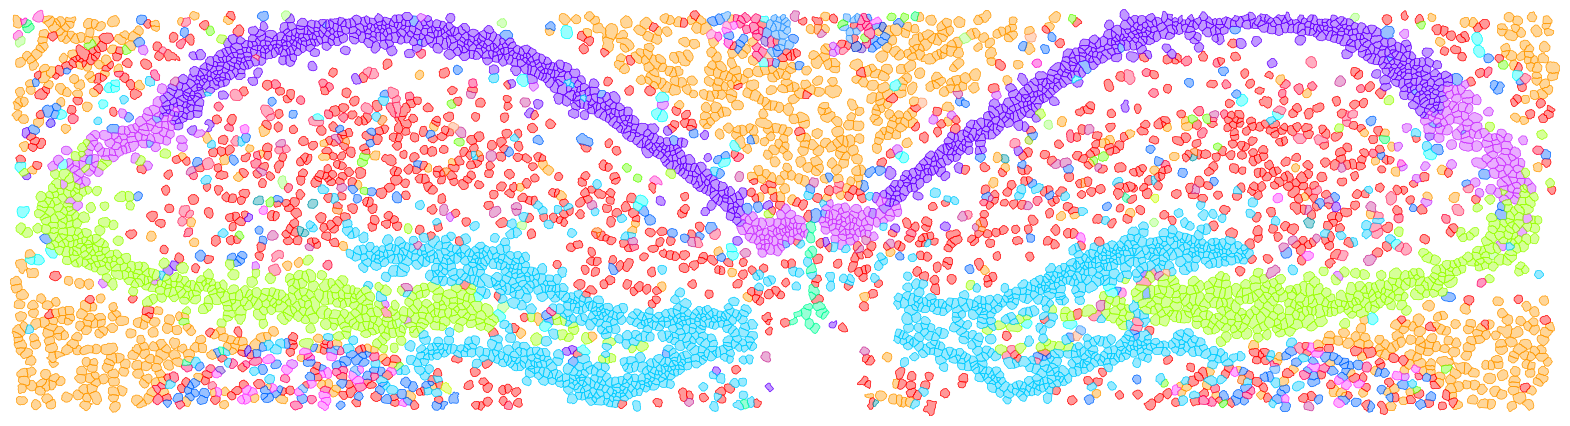

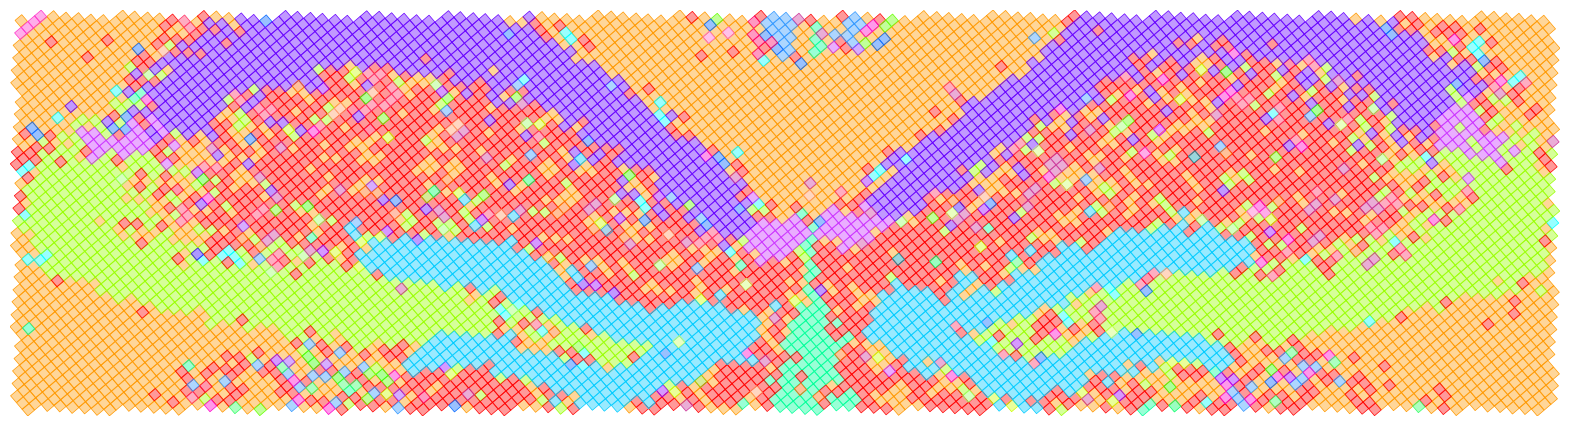

In [52]:
dapi = np.load("/import/home3/yhchenmath/Dataset/DeconvSeg/stereoseq_mouse_brain/resized_dapi.npy")[None, :, :]

import spatialdata as sd
gdf_stereoseq = append_xenium_boundary(mask_stereoseq, None, None, celltype = adata_st_svt_stereoseq.obs["celltype"])
boundaries = sd.models.ShapesModel.parse(gdf_stereoseq)
img = sd.models.Image2DModel.parse(dapi, dims=("c", "x", "y"))
sdata_stereoseq = sd.SpatialData()
sdata_stereoseq.shapes["cell_boundaries"] = boundaries
sdata_stereoseq.images["dapi"] = img

import math

theta =  - math.pi * 1.35 / 6
rotation = sd.transformations.Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

sd.transformations.set_transformation(sdata_stereoseq.images["dapi"], rotation, to_coordinate_system="global")
sd.transformations.set_transformation(sdata_stereoseq.shapes["cell_boundaries"], rotation, to_coordinate_system="global")

sdata_stereoseq.shapes["cell_boundaries_rotated"] = sd.transform(sdata_stereoseq.shapes["cell_boundaries"], to_coordinate_system="global")

x_min, x_max, y_min, y_max = -780, -240, 3360, 5520
sdata_roi = sdata_stereoseq.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("y", "x"), target_coordinate_system="global"
)
ct_col = sdata_roi.shapes["cell_boundaries_rotated"].celltype
cts = sdata_roi.shapes["cell_boundaries_rotated"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"cell_boundaries_rotated_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["cell_boundaries_rotated"][ct_col == ct]

center = sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid
# Drop all centroids in [-250, -110] [4400, 4600]
sdata_roi.shapes["cell_boundaries_rotated_DG"] = sdata_roi.shapes["cell_boundaries_rotated_DG"][
    (sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid.y < -400) |
    (sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid.y > -105) |
    (sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid.x < 4400) |
    (sdata_roi.shapes["cell_boundaries_rotated_DG"].geometry.centroid.x > 4600)
]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

tmp = None
draw_cts = sdata_roi.shapes["cell_boundaries_rotated"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"cell_boundaries_rotated_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"cell_boundaries_rotated_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

# RCTD
adata_st_rctd_stereoseq = sc.read_h5ad("/home/share/yqzeng/data/stereoseq_mouse_brain/bin50.h5ad")
import pandas as pd

rctd_result = pd.read_csv("/home/share/yqzeng/data/stereoseq_mouse_brain/stereoseq_mouse_brain_rctd_results.csv", index_col=0)
# Index -> String
rctd_result.index = rctd_result.index.astype(int).astype(str)

adata_st_rctd_stereoseq = adata_st_rctd_stereoseq[rctd_result.index]
adata_st_rctd_stereoseq.obs["celltype"] = rctd_result["first_type"]
# Replace - to _
adata_st_rctd_stereoseq.obs["celltype"] = adata_st_rctd_stereoseq.obs["celltype"].str.replace("-", "_")
# Filter
sc.pp.filter_cells(adata_st_rctd_stereoseq, min_counts=500)

# Mapping rctd
adata_st_rctd_stereoseq.obs["celltype"] = adata_st_rctd_stereoseq.obs["celltype"].map({
    k.replace(" ", "_").replace("/", "_").replace("-", "_"): k for k, _ in celltype_mapping.items()
})

adata_st_rctd_stereoseq.obs["x"] = adata_st_rctd_stereoseq.obs["x"] // 4
adata_st_rctd_stereoseq.obs["y"] = adata_st_rctd_stereoseq.obs["y"] // 4

# x, y // 4
from shapely.geometry import Polygon
from skimage.measure import find_contours
import geopandas as gpd



# Create a gdf: index adata_st_rctd_stereoseq.obs_names, geometry: center is (x, y), square, width is 12.5
gdf_rctd = gpd.GeoDataFrame(
    index=adata_st_rctd_stereoseq.obs_names,
    geometry=[
        Polygon([
            (x - 6.25, y - 6.25),
            (x + 6.25, y - 6.25),
            (x + 6.25, y + 6.25),
            (x - 6.25, y + 6.25)
        ])
        for x, y in zip(adata_st_rctd_stereoseq.obs["x"], adata_st_rctd_stereoseq.obs["y"])
    ]
)

boundaries = sd.models.ShapesModel.parse(gdf_rctd)
boundaries["celltype"] = adata_st_rctd_stereoseq.obs["celltype"].values
sdata_stereoseq.shapes["rctd"] = boundaries
sd.transformations.set_transformation(sdata_stereoseq.shapes["rctd"], rotation, to_coordinate_system="global")

x_min, x_max, y_min, y_max = -780, -240, 3360, 5520
sdata_roi = sdata_stereoseq.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("y", "x"), target_coordinate_system="global"
)

ct_col = sdata_roi.shapes["rctd"].celltype
cts = sdata_roi.shapes["rctd"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"rctd_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["rctd"][ct_col == ct]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

tmp = None
draw_cts = sdata_roi.shapes["rctd"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"rctd_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"rctd_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

In [ ]:
from spatialdata_io import xenium
import numpy as np

sdata = xenium(
    path="/import/home2/yhchenmath/Dataset/CellSeg/Xenium_mouse_brain/",) 


mask_svt = np.load("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/new_segmentation_mask.npy").astype("int32")
adata_st_svt_xenium = sc.read_h5ad("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/epoch_250/cell_deconv.h5ad")

adata_st_10x = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/10X_scvi.h5ad")
sdata.shapes["cell_boundaries"]["celltype"] = adata_st_10x.obs["C_scANVI"].values

import geopandas
import spatialdata as sd
import scanpy as sc
df = geopandas.read_file("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/proseg_cell-polygons.geojson")
df.set_index("cell", inplace=True)

boundaries = sd.models.ShapesModel.parse(df)
sdata.shapes["proseg_boundaries"] = boundaries
seg_transformation = sd.transformations.get_transformation(sdata.shapes["nucleus_boundaries"])
sd.transformations.set_transformation(sdata.shapes["proseg_boundaries"], seg_transformation,
                                        to_coordinate_system="global")
sdata.shapes["proseg_boundaries"].index = sdata.shapes["proseg_boundaries"].index.astype(str)

proseg_adata = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/proseg_scvi.h5ad")

sdata.shapes["proseg_boundaries"] = sdata.shapes["proseg_boundaries"].loc[proseg_adata.obs_names.tolist()]
sdata.shapes["proseg_boundaries"]["celltype"] = proseg_adata.obs["C_scANVI"].values

mask_baysor = np.load("/import/home3/yhchenmath/baysor_out/xenium_mouse_brain_baysor_segmentation_mask.npy")
adata_st_baysor = sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/baysor_scvi.h5ad")

append_xenium_boundary(mask_svt, sdata, "svt_boundaries", celltype=adata_st_svt_xenium.obs["celltype"])
append_xenium_boundary(mask_baysor, sdata, "baysor_boundaries", celltype=adata_st_baysor.obs["C_scANVI"])

In [ ]:
x_min, x_max, y_min, y_max = 19500, 26000, 11000, 23000
sdata_roi = sdata.query.bounding_box(
    min_coordinate=[x_min, y_min], max_coordinate=[x_max, y_max], axes=("y", "x"), target_coordinate_system="global"
)

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_Pvalb` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_L5_IT_CTX` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_L5_PT_CTX` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anaconda3/envs/cellseg/lib/python3.9/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries_L6_CT_CTX` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/yhchenmath/anacond

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

(10802.93411764706, 23447.64, 26259.28329411765, 19271.048)

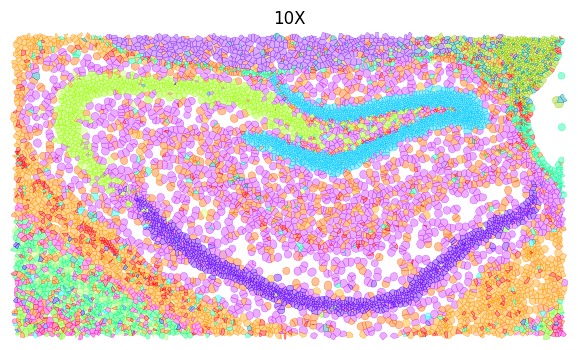

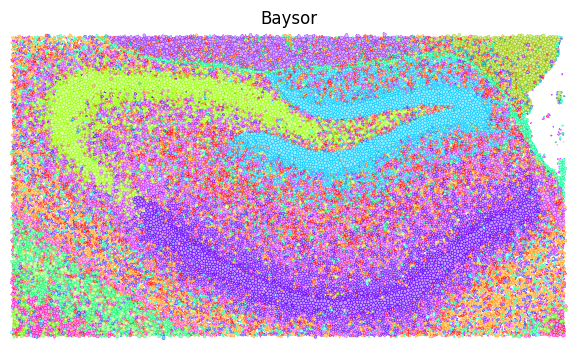

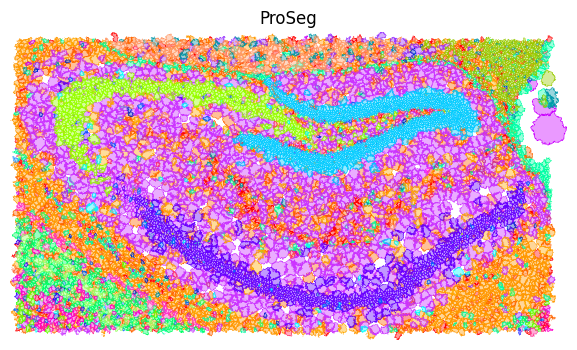

In [69]:
ct_col = sdata_roi.shapes["cell_boundaries"].celltype
cts = sdata_roi.shapes["cell_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["cell_boundaries"][ct_col == ct]

ct_col = sdata_roi.shapes["baysor_boundaries"].celltype
cts = sdata_roi.shapes["baysor_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"baysor_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["baysor_boundaries"][ct_col == ct]

ct_col = sdata_roi.shapes["proseg_boundaries"].celltype
cts = sdata_roi.shapes["proseg_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"proseg_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["proseg_boundaries"][ct_col == ct]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

tmp = None # sdata_roi_1.pl.render_images("morphology_focus")
draw_cts = sdata_roi.shapes["cell_boundaries"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.25, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"cell_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.25, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="10X", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

tmp = None # sdata_roi_1.pl.render_images("morphology_focus")
draw_cts = sdata_roi.shapes["baysor_boundaries"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"baysor_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.25, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"baysor_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.25, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="Baysor", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

tmp = None # sdata_roi_1.pl.render_images("morphology_focus")
draw_cts = sdata_roi.shapes["proseg_boundaries"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"proseg_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.25, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"proseg_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.25, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="ProSeg", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as 

(10920.0, 23098.823529411766, 26101.176470588238, 19409.411764705885)

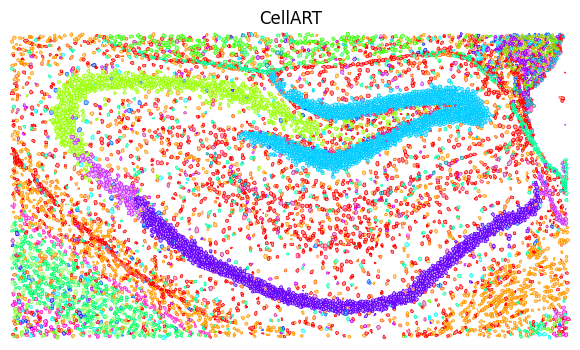

In [68]:
# CellART
ct_col = sdata_roi.shapes["svt_boundaries"].celltype
cts = sdata_roi.shapes["svt_boundaries"].celltype.unique()
for ct in cts:
    sdata_roi.shapes[f"svt_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}"] = sdata_roi.shapes["svt_boundaries"][ct_col == ct]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

tmp = None # sdata_roi_1.pl.render_images("morphology_focus")
draw_cts = sdata_roi.shapes["svt_boundaries"].celltype.unique().tolist()
for ct in draw_cts:
    color = celltype_mapping_renamed[ct.replace(' ', '_').replace('/', '_').replace('-', '_')]
    if tmp is None:
        tmp = sdata_roi.pl.render_shapes(
        f"svt_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
    else:
        tmp = tmp.pl.render_shapes(
        f"svt_boundaries_{ct.replace(' ', '_').replace('/', '_').replace('-', '_')}",
        color=color, fill_alpha=0.4, outline_width=0.5, outline_color = color, outline_alpha=1
    )
tmp.pl.show(coordinate_systems="global", title="CellART", frameon=False, legend_loc='none', return_ax=True, ax=ax)
ax.axis("off")

### Metric

In [ ]:
celltype_mapping = {
    'Astro': '#ff0000',
    'Oligo': '#ff9900',
    'L2/3 IT CTX': '#ccff00',
    'L4/5 IT CTX': '#33ff00',
    'L6 CT CTX': '#00ff66',
    'Sst': '#00ffff',
    'Pvalb': '#0066ff',
    'DG': '#00ccff',
    'L2/3 IT ENTl': '#9900ff',
    'L5 IT CTX': '#ff00cc',
    'L4 RSP-ACA': '#ff0066',
    'L5/6 IT TPE-ENT': '#ff0033',
    'Endo': '#ff6600',
    'L2 IT ENTl': '#99cc00',     # Changed from #ccff00
    'L5 PT CTX': '#66ff00',
    'Lamp5': '#cc3399',          # Changed from #ff0066
    'VLMC': '#00ff99',
    'L2/3 IT PPP': '#3399ff',    # Changed from #0066ff
    'Car3': '#3300ff',
    'CA1-ProS': '#6600ff',
    'SMC-Peri': '#cc00ff',
    'L6b CTX': '#ff33cc',        # Changed from #ff00cc
    'L5/6 NP CTX': '#ff3399',    # Changed from #ff0099
    'Sncg': '#ff3366',           # Changed from #ff0033
    'Vip': '#ff9966',            # Changed from #ff6600
    'L6 IT CTX': '#99ff66',      # Changed from #ccff00
    'CA3': '#99ff00',
    'L3 IT ENT': '#33ff66',      # Changed from #33ff00
    'Micro-PVM': '#00ffaa',      # Changed from #00ff99
    'CR': '#0099aa',             # Changed from #00ffff
    'L6 IT ENTl': '#3399cc',     # Changed from #0099ff
    'Sst Chodl': '#0033cc',      # Changed from #0033ff
    'L2 IT ENTm': '#6633cc',     # Changed from #6600ff
    'NP SUB': '#9933ff',         # Changed from #9900ff
    
    'CA2-IG-FC': '#cc33ff',      # Changed from #cc00ff
    'L5 PPP': '#ff33ff',         # Changed from #ff00ff
    'CT SUB': '#ff66cc',         # Changed from #ff0099
    'NP PPP': '#3333ff',         # Changed from #3300ff
    'L6b/CT ENT': '#ff6633',     # Changed from #ff3300
    'SUB-ProS': '#ffaa00',       # Changed from #ff9900
    'L2/3 IT RHP': '#ccff66',    # Changed from #ccff00

    'Others': '#F0F0F0'          # Grey, left unchanged
}

celltype_mapping_renamed = {
    k.replace(" ", "_").replace("/", "_").replace("-", "_"): v for k, v in celltype_mapping.items()
}


In [ ]:
import scanpy as sc

adata_dict = {
    "VisiumHD-CellART": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/epoch_550/cell_deconv.h5ad"),
    "VisiumHD-RCTD": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/rctd.h5ad"),
    "VisiumHD-Bin2Cell":  sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/VisiumMouseBrainNMF/annotated_adata_bin2cell_scvi.h5ad"),
    "VisiumHD-StarDist": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/VisiumMouseBrainNMF/annotated_adata_stardist_scvi.h5ad"),

    "Xenium-CellART": sc.read_h5ad("/import/home2/yhchenmath/Code/SVT/LOG/XeniumMouseBrain_Annotation_with_feature/epoch_250/cell_deconv.h5ad"),
    "Xenium-10X": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/10X_scvi.h5ad"),
    "Xenium-Baysor": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/baysor_scvi.h5ad"),
    "Xenium-ProSeg": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/Data/XeniumMouseBrain/proseg_scvi.h5ad"),

    "MERFISH-CellART": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/MerfishMouseBrain_Annotation/epoch_600/cell_deconv.h5ad"),
    "MERFISH-Vizgen": sc.read_h5ad("/import/home3/yhchenmath/Code/SVT/Data/MerfishMouseBrain/vizgen_scvi.h5ad"),

    "Stereoseq-CellART": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/StereoseqAnnotationNoPatch/epoch_850/cell_deconv.h5ad"),
    "Stereoseq-RCTD": sc.read_h5ad("/import/home2/yhchenmath/Code/Triplet/LOG/VisiumhdMouseBrain_Annotation_Long/bin50_annotated.h5ad")
}

import pandas as pd
gene_info = pd.read_csv("/import/home3/yhchenmath/Dataset/DeconvSeg/stereoseq_mouse_brain/ensembl_ids.txt", index_col=None, header=None, sep="\t")
# Columns: ensembl_id, gene_name
gene_info.columns = ["ensembl_id", "gene_name"]
# Drop NaN in gene_name
gene_info = gene_info.dropna(subset=["gene_name"])
# Set ensembl_id as index
gene_info = gene_info.set_index("gene_name")

adata_dict["Stereoseq-RCTD"] = adata_dict["Stereoseq-RCTD"][:, gene_info['ensembl_id'].tolist()]
adata_dict["Stereoseq-RCTD"].var_names = gene_info.index.tolist()

# Mapping
for k in adata_dict.keys():
    # If exist C_scANVI in obs, rename to celltype
    if "C_scANVI" in adata_dict[k].obs:
        adata_dict[k].obs["celltype"] = adata_dict[k].obs["C_scANVI"]
    # If k contains RCTD, replace(" ", "_").replace("/", "_").replace("-", "_")
    if "RCTD" in k:
        adata_dict[k].obs["celltype"] = adata_dict[k].obs["celltype"].str.replace(" ", "_").str.replace("/", "_").str.replace("-", "_")
        # Drop celltype is NaN
        adata_dict[k] = adata_dict[k][~adata_dict[k].obs["celltype"].isna(), :]
    # Mapping
    else:
        adata_dict[k].obs["celltype"] = adata_dict[k].obs["celltype"].map(celltype_map)
    # Astype category
    adata_dict[k].obs["celltype"] = adata_dict[k].obs["celltype"].astype("category")
    adata_dict[k].var_names_make_unique()

adata_dict["VisiumHD-RCTD"] = adata_dict["VisiumHD-RCTD"][:, adata_dict["VisiumHD-CellART"].var_names]
adata_dict["Stereoseq-RCTD"] = adata_dict["Stereoseq-RCTD"][:, adata_dict["Stereoseq-CellART"].var_names]

# Single cell reference
adata_sc = sc.read("/home/share/ychenlp/scrna_mouse_brain.h5ad")
adata_sc.obs["celltype"] = adata_sc.obs["subclass_label"].map(celltype_map)
# Only select those celltype in map
adata_sc = adata_sc[adata_sc.obs["celltype"].isin(celltype_map.values())]

ad_st_dict = {
    k: v.copy() for k, v in adata_dict.items()
}
corr_result = {

}

all_avg_df = {}

for method in ad_st_dict.keys():
    avg_df = pd.DataFrame(index=ad_st_dict[method].obs["celltype"].unique(), columns=ad_st_dict[method].var.index)
    ad_temp= ad_st_dict[method].copy()
    # Scale
    sc.pp.scale(ad_temp, max_value=10)
    for cell_type in ad_temp.obs["celltype"].unique():
        ad = ad_temp[ad_temp.obs["celltype"] == cell_type]
        avg_df.loc[cell_type] = ad.X.mean(axis=0)
    all_avg_df[method] = avg_df


import numpy as np
from scipy.stats import pearsonr

avg_sc = {}
for method in all_avg_df.keys():
    ad_temp = adata_sc.copy()
    ad_temp = ad_temp[:, all_avg_df[method].columns]
    # Filtered count
    sc.pp.filter_cells(ad_temp, min_counts=1)
    # Scale
    sc.pp.scale(ad_temp, max_value=10)
    avg_sc[method] = pd.DataFrame(index=ad_temp.obs["celltype"].unique(), columns=ad_temp.var.index)
    for cell_type in ad_temp.obs["celltype"].unique():
        ad = ad_temp[ad_temp.obs["celltype"] == cell_type]
        avg_sc[method].loc[cell_type] = ad.X.mean(axis=0)


all_corr_df = {}
for method in all_avg_df.keys():
    corr_df = pd.DataFrame(index=adata_sc.obs["celltype"].unique(), columns=all_avg_df[method].index)
    for cell_type in adata_sc.obs["celltype"].unique():
        for method_cell_type in all_avg_df[method].index:
            corr_df.loc[cell_type, method_cell_type] = pearsonr(all_avg_df[method].loc[method_cell_type], avg_sc[method].loc[cell_type])[0]
    all_corr_df[method] = corr_df
    # Convert to float
    all_corr_df[method] = all_corr_df[method].astype(float)

celltype_corr_df = pd.DataFrame(index=list(all_corr_df.keys()), columns=adata_sc.obs["celltype"].unique())
for cell_type in adata_sc.obs["celltype"].unique():
    # If not appear in some methods, skip
    for method in all_corr_df.keys():
        try:
            celltype_corr_df.loc[method, cell_type] = all_corr_df[method].loc[cell_type, cell_type]
        except:
            celltype_corr_df.loc[method, cell_type] = 0
# Drop NaN columns
celltype_corr_df = celltype_corr_df.dropna(axis=1)

/tmp/ipykernel_866475/422008867.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_866475/422008867.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_866475/422008867.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_866475/422008867.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_866475/422008867.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

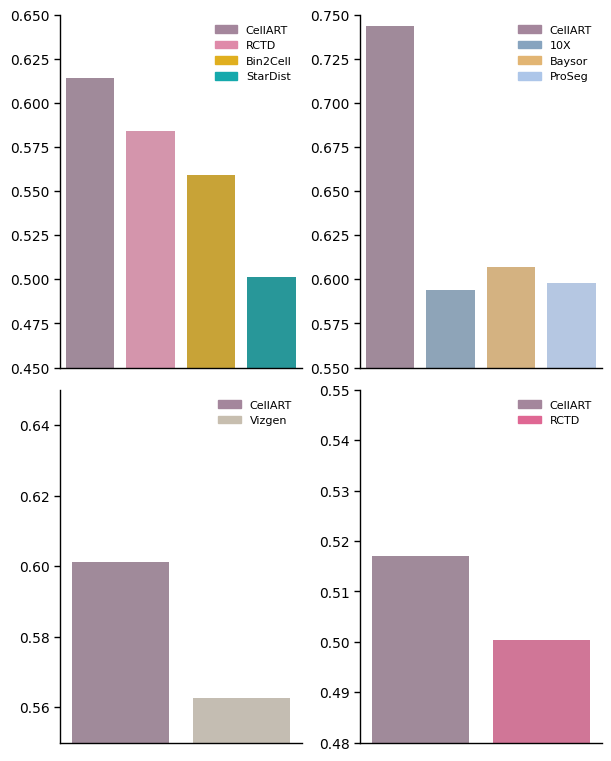

In [64]:
method_colors = {
    "VisiumHD-CellART": "#A4869C",
    "VisiumHD-RCTD": "#DF8AA9",
    "VisiumHD-Bin2Cell": "#E0AF1F",
    "VisiumHD-StarDist": "#15A9AC",

    "Xenium-CellART": "#A4869C",
    "Xenium-10X": "#87A4BF",
    "Xenium-Baysor": "#E2B573",
    "Xenium-ProSeg": "#ADC6E9",

    "MERFISH-CellART": "#A4869C",
    "MERFISH-Vizgen": "#C7BEAF",

    "Stereoseq-CellART": "#A4869C",
    "Stereoseq-RCTD": "#DF6793"
}

df_result = pd.Series(celltype_corr_df.mean(axis=1), name="correlation")
# Split index into Dataset and Method
df_result = df_result.rename_axis("Dataset-Method").reset_index()
df_result[["Dataset", "Method"]] = df_result["Dataset-Method"].str.split("-", expand=True)

# Map colors
df_result["Color"] = df_result["Dataset-Method"].map(method_colors)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 7.5), constrained_layout=True)
axes = axes.flatten()

lim_upper = [0.65, 0.75, 0.65, 0.55]
lim_lower = [0.45, 0.55, 0.55, 0.48]

datasets = df_result["Dataset"].unique()
# Iterate through datasets and plot
for i, dataset in enumerate(datasets):
    ax = axes[i]
    subset = df_result[df_result["Dataset"] == dataset]

    # Create bar plot for each dataset
    sns.barplot(
        x="Method", y="correlation", data=subset,
        palette=subset.set_index("Method")["Color"].to_dict(),
        ax=ax,
        legend=True
    )
    
    # Customize each subplot
    ax.set_title(f"", fontsize=14)
    # ax.set_ylim(0.5, 0.75)
    ax.set_ylim(lim_lower[i], lim_upper[i])
    ax.tick_params(axis="x", rotation=45)

    # Axis labels and limits
    ax.set_ylabel("")
    ax.set_xlabel('')
    # ax.set(ylim=(0.18, 0.22))

    # Rotate x-tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Remove grid
    ax.grid(False)

    # Customize spines (axis lines)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add small outward ticks
    ax.tick_params(
        axis='both',
        which='major',
        direction='out',
        length=4,
        width=1,
        color='black',
        bottom=True, top=False, left=True, right=False
    )

    # Create a legend for the current subplot
    legend_handles = [
        mpatches.Patch(color=method_colors[f"{dataset}-{method}"], label=method)
        for method in subset["Method"]
    ]
    ax.legend(
        handles=legend_handles,
        loc='upper right',  # Adjust legend position
        frameon=False,  # Remove legend box frame
        fontsize=8
    )
    
    ax.set_xticks([])
    ax.tick_params(axis='y', labelsize=10)


# Turn off unused subplot axes if any
for j in range(i + 1, len(axes)):
    axes[j].axis("off")


# Add a global title
# fig.suptitle("Comparison of Correlations Within Each Dataset", fontsize=16)

# Show the plot
plt.show()